In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.options.display.max_rows = 999
from IPython.display import display
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
import sklearn
import pickle
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
#import plotly.plotly as py
from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal
#import plotly 
#plotly.tools.set_credentials_file(username='Srinivas31286', api_key='DRdqteJGOM2cIpl40qf0')

In [2]:
dailyData=pd.read_csv('/Users/srinivasbs/Desktop/Srinivas/Quarter 6/DV/Final Project/divvy2017.csv')
dailyData.head(10)

trip_id  year  month  week  day  hour    usertype  gender      starttime  \
0  13518905  2017      3    13    4    23  Subscriber    Male  3/31/17 23:59   
1  13518904  2017      3    13    4    23  Subscriber    Male  3/31/17 23:56   
2  13518903  2017      3    13    4    23  Subscriber  Female  3/31/17 23:55   
3  13518902  2017      3    13    4    23  Subscriber    Male  3/31/17 23:54   
4  13518901  2017      3    13    4    23  Subscriber  Female  3/31/17 23:53   
5  13518900  2017      3    13    4    23  Subscriber    Male  3/31/17 23:51   
6  13518899  2017      3    13    4    23  Subscriber    Male  3/31/17 23:51   
7  13518898  2017      3    13    4    23  Subscriber    Male  3/31/17 23:50   
8  13518897  2017      3    13    4    23  Subscriber    Male  3/31/17 23:50   
9  13518896  2017      3    13    4    23  Subscriber    Male  3/31/17 23:49   

        stoptime  tripduration  temperature  events  from_station_id  \
0   4/1/17 00:13     14.283333         37.9  cloudy               66   
1   4/1/17 00:00      3.933333         37.9  cloudy              199   
2   4/1/17 00:01      5.800000         37.9  cloudy              520   
3  3/31/17 23:59      4.800000         37.9  cloudy              110   
4   4/1/17 00:00      6.916667         37.9  cloudy              327   
5  3/31/17 23:55      4.033333         37.9  cloudy              143   
6  3/31/17 23:57      6.016667         37.9  cloudy               81   
7  3/31/17 23:56      5.900000         37.9  cloudy               56   
8  3/31/17 23:55      4.983333         37.9  cloudy              210   
9   4/1/17 00:09     19.550000         37.9  cloudy              117   

             from_station_name  start_latitude  start_longitude  \
0         Clinton St & Lake St       41.885637       -87.641823   
1       Wabash Ave & Grand Ave       41.891466       -87.626761   
2   Greenview Ave & Jarvis Ave       42.015962       -87.668570   
3        Dearborn St & Erie St       41.893992       -87.629318   
4  Sheffield Ave & Webster Ave       41.921540       -87.653818   
5    Sedgwick St & Webster Ave       41.922167       -87.638888   
6           Daley Center Plaza       41.884241       -87.629634   
7    Desplaines St & Kinzie St       41.888716       -87.644448   
8    Ashland Ave & Division St       41.903450       -87.667747   
9     Wilton Ave & Belmont Ave       41.940180       -87.653040   

   dpcapacity_start  to_station_id                to_station_name  \
0                23            171          May St & Cullerton St   
1                15             26       McClurg Ct & Illinois St   
2                23            432            Clark St & Lunt Ave   
3                23            142           McClurg Ct & Erie St   
4                19            331  Halsted St & Blackhawk St (*)   
5                15            289          Wells St & Concord Ln   
6                39             41           Federal St & Polk St   
7                27             77        Clinton St & Madison St   
8                19             69         Damen Ave & Pierce Ave   
9                23             29       Noble St & Milwaukee Ave   

   end_latitude  end_longitude  dpcapacity_end  
0     41.855136     -87.654127              11  
1     41.890359     -87.617532              31  
2     42.009074     -87.674190              19  
3     41.894503     -87.617854              31  
4     41.908537     -87.648627              20  
5     41.912133     -87.634656              19  
6     41.872078     -87.629544              19  
7     41.882242     -87.641066              31  
8     41.909396     -87.677692              19  
9     41.900680     -87.662600              15

In [3]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
trip_id              1048575 non-null int64
year                 1048575 non-null int64
month                1048575 non-null int64
week                 1048575 non-null int64
day                  1048575 non-null int64
hour                 1048575 non-null int64
usertype             1048575 non-null object
gender               1048575 non-null object
starttime            1048575 non-null object
stoptime             1048575 non-null object
tripduration         1048575 non-null float64
temperature          1048575 non-null float64
events               1048575 non-null object
from_station_id      1048575 non-null int64
from_station_name    1048575 non-null object
start_latitude       1048575 non-null float64
start_longitude      1048575 non-null float64
dpcapacity_start     1048575 non-null int64
to_station_id        1048575 non-null int64
to_station_name      1048575 non-null

In [4]:
#dailyData.from_station_id.count().groupby('from_station_id')
dailyData.groupby('from_station_name')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_name
Clinton St & Washington Blvd    18712
Clinton St & Madison St         15709
Canal St & Adams St             14928
Canal St & Madison St           12045
Kingsbury St & Kinzie St        11884
Canal St & Jackson Blvd         11592
Franklin St & Monroe St         10459
Columbus Dr & Randolph St       10121
Daley Center Plaza               9526
Michigan Ave & Washington St     9319
Name: trip_id, dtype: int64

In [5]:
dailyData.groupby('from_station_id')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_id
91     18712
77     15709
192    14928
174    12045
133    11884
75     11592
287    10459
195    10121
81      9526
43      9319
Name: trip_id, dtype: int64

In [6]:
#No null values in our data which is a good thing
dailyData.isnull().sum().sort_values(ascending=False)


dpcapacity_end       0
tripduration         0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
temperature          0
end_longitude        0
events               0
from_station_id      0
from_station_name    0
start_latitude       0
start_longitude      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
end_latitude         0
trip_id              0
dtype: int64

In [7]:
dailyData.shape

(1048575, 23)

In [8]:
dailyData['from_station_name'].nunique()

577

# Creating new dataframe with only top 10 stations data

In [9]:
Top_Daily_Data = dailyData[(dailyData.from_station_id == 91) | (dailyData.from_station_id == 77) |(dailyData.from_station_id == 192) |(dailyData.from_station_id == 174) |(dailyData.from_station_id == 133) |(dailyData.from_station_id == 75) | (dailyData.from_station_id == 287) |(dailyData.from_station_id == 195) |(dailyData.from_station_id == 81) | (dailyData.from_station_id == 43)]

In [10]:
Top_Daily_Data.groupby('from_station_id')['trip_id'].count().sort_values(ascending=False).head(10)

from_station_id
91     18712
77     15709
192    14928
174    12045
133    11884
75     11592
287    10459
195    10121
81      9526
43      9319
Name: trip_id, dtype: int64

In [11]:
Top_Daily_Data['from_station_name'].unique()

array(['Daley Center Plaza', 'Clinton St & Madison St',
       'Clinton St & Washington Blvd', 'Canal St & Jackson Blvd',
       'Michigan Ave & Washington St', 'Canal St & Madison St',
       'Kingsbury St & Kinzie St', 'Canal St & Adams St',
       'Columbus Dr & Randolph St', 'Franklin St & Monroe St'],
      dtype=object)

In [12]:
#df.from_station_name
pd.crosstab(Top_Daily_Data['from_station_name'], Top_Daily_Data['to_station_name'], margins=True)


to_station_name               900 W Harrison St  Aberdeen St & Jackson Blvd  \
from_station_name                                                             
Canal St & Adams St                          16                         174   
Canal St & Jackson Blvd                     102                         186   
Canal St & Madison St                         6                          24   
Clinton St & Madison St                      64                         106   
Clinton St & Washington Blvd                  9                         182   
Columbus Dr & Randolph St                     1                           2   
Daley Center Plaza                            2                          15   
Franklin St & Monroe St                       1                          44   
Kingsbury St & Kinzie St                      2                          25   
Michigan Ave & Washington St                  2                          27   
All                                         205                         785   

to_station_name               Aberdeen St & Monroe St  \
from_station_name                                       
Canal St & Adams St                               184   
Canal St & Jackson Blvd                            89   
Canal St & Madison St                              75   
Clinton St & Madison St                           171   
Clinton St & Washington Blvd                       87   
Columbus Dr & Randolph St                          24   
Daley Center Plaza                                 38   
Franklin St & Monroe St                           162   
Kingsbury St & Kinzie St                          110   
Michigan Ave & Washington St                       45   
All                                               985   

to_station_name               Ada St & Washington Blvd  Adler Planetarium  \
from_station_name                                                           
Canal St & Adams St                                 45                  6   
Canal St & Jackson Blvd                             27                  2   
Canal St & Madison St                              100                 25   
Clinton St & Madison St                            136                  1   
Clinton St & Washington Blvd                       161                  5   
Columbus Dr & Randolph St                            8                 34   
Daley Center Plaza                                  19                  7   
Franklin St & Monroe St                             46                  0   
Kingsbury St & Kinzie St                            40                  4   
Michigan Ave & Washington St                        19                  9   
All                                                601                 93   

to_station_name               Albany Ave & Bloomingdale Ave  \
from_station_name                                             
Canal St & Adams St                                       0   
Canal St & Jackson Blvd                                   0   
Canal St & Madison St                                     0   
Clinton St & Madison St                                   1   
Clinton St & Washington Blvd                              1   
Columbus Dr & Randolph St                                 0   
Daley Center Plaza                                        0   
Franklin St & Monroe St                                   8   
Kingsbury St & Kinzie St                                  1   
Michigan Ave & Washington St                              0   
All                                                      11   

to_station_name               Artesian Ave & Hubbard St  \
from_station_name                                         
Canal St & Adams St                                  11   
Canal St & Jackson Blvd                               3   
Canal St & Madison St                                61   
Clinton St & Madison St                               8   
Clinton St & Washington Blvd                         1

# Lets visualize the data we have

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


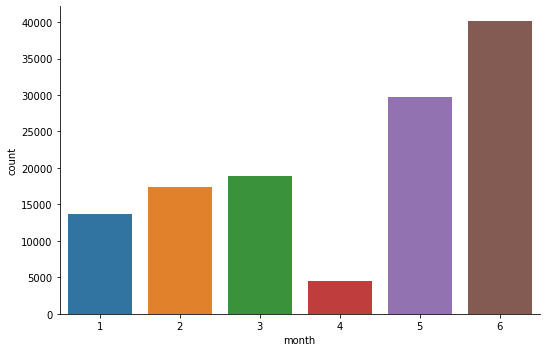

In [13]:
#June month has the maximum usage , which can be linked to the summer season increasing number of bike users
sns.factorplot(x='month',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


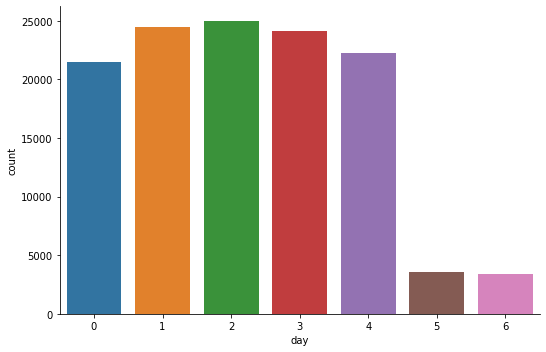

In [14]:
#Weekday bicycle usage is higher compared to weekends
sns.factorplot(x='day',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


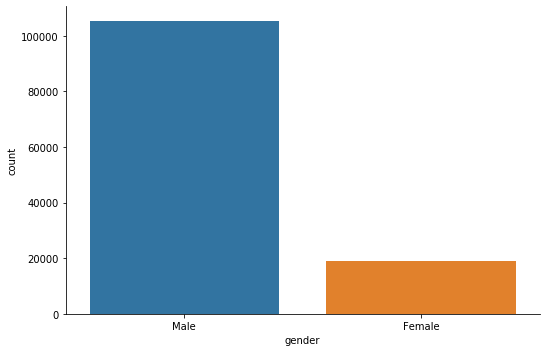

In [15]:
#Significantly more male users
sns.factorplot(x='gender',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


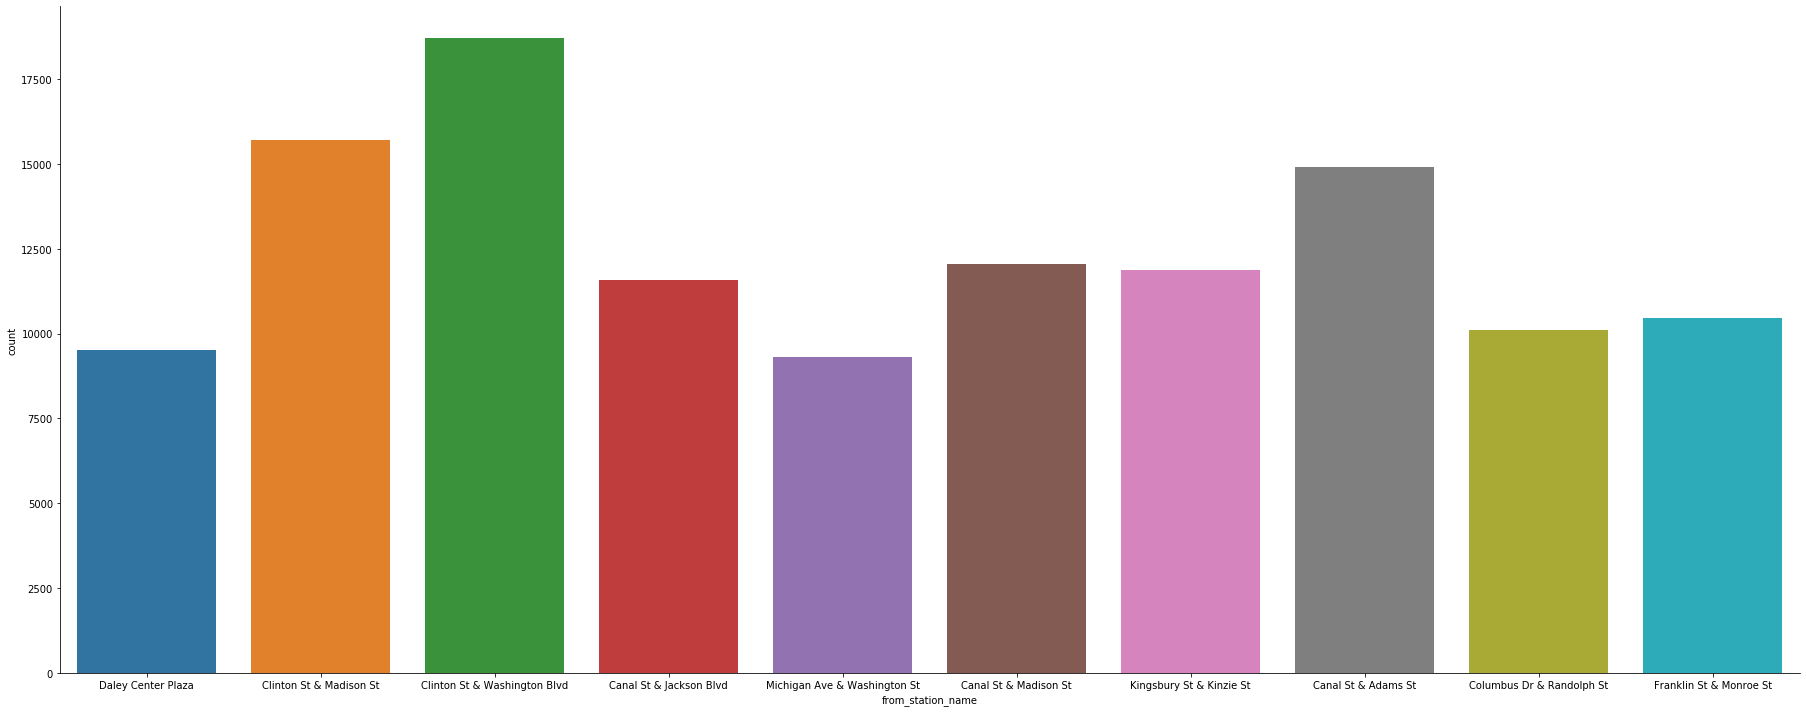

In [16]:
 sns.factorplot(x='from_station_name',data=Top_Daily_Data,kind='count',size=10,aspect=2.5)


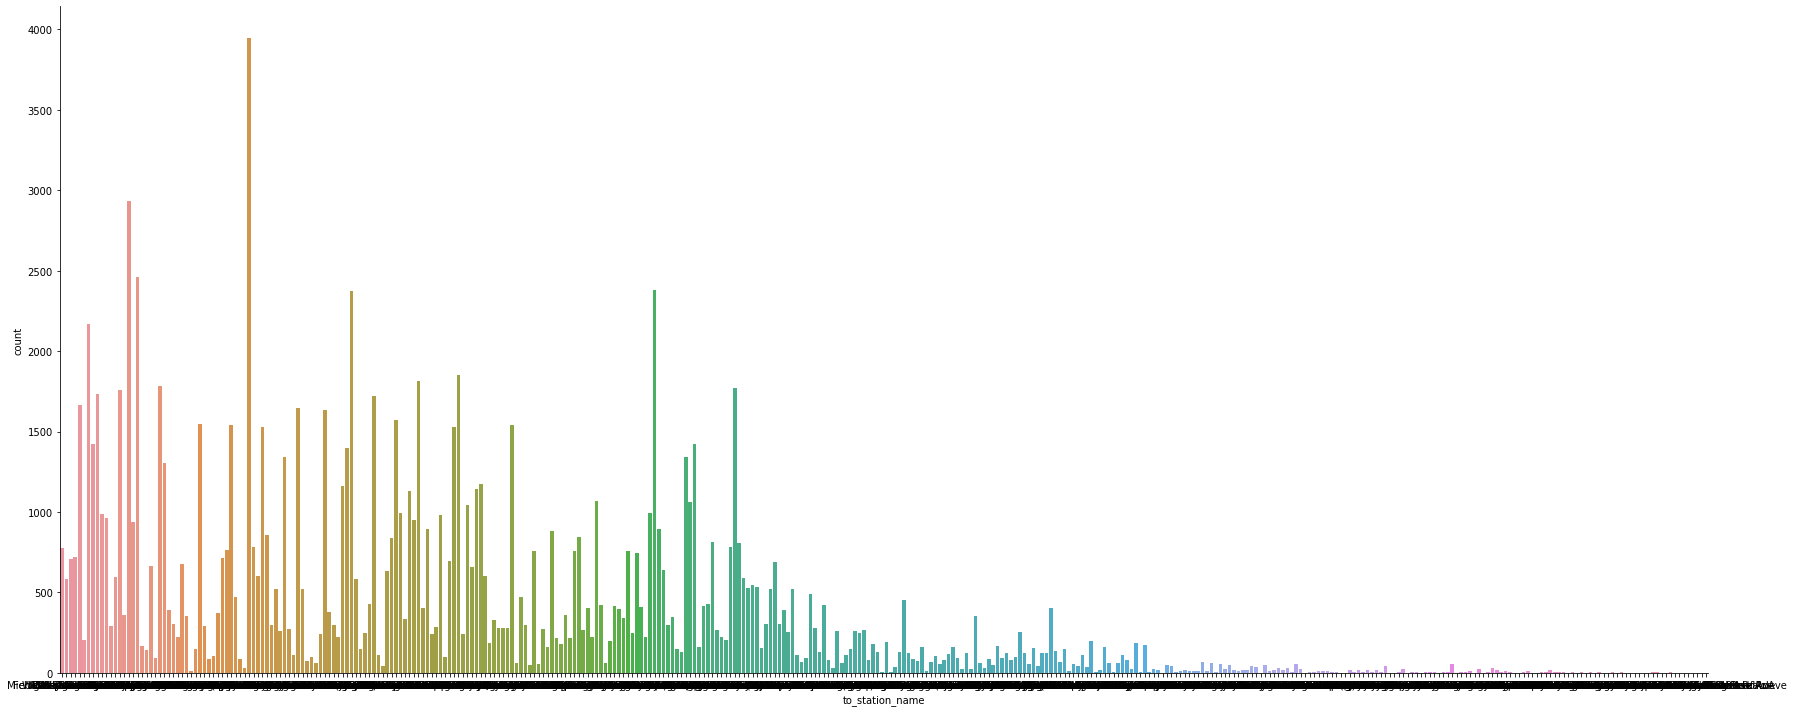

In [17]:
 sns.factorplot(x='to_station_name',data=Top_Daily_Data,kind='count',size=10,aspect=2.5)


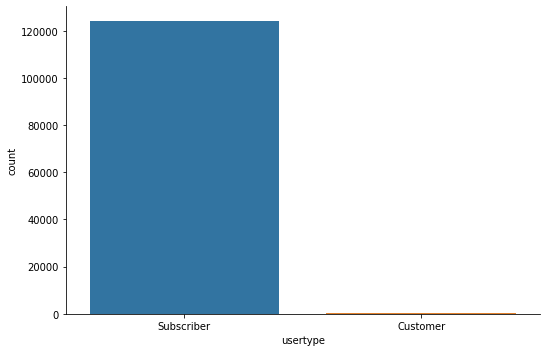

In [18]:
#Negligible number of non subscribers
sns.factorplot(x='usertype',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


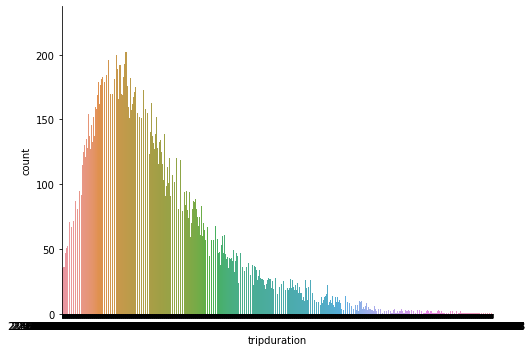

In [19]:
sns.factorplot(x='tripduration',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


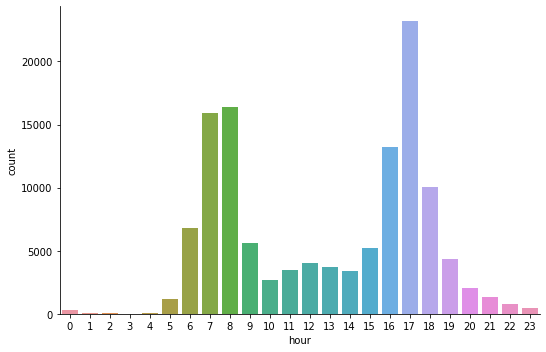

In [20]:
#Morning and evening peak hours of bicycle usage, which could be office goers
sns.factorplot(x='hour',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


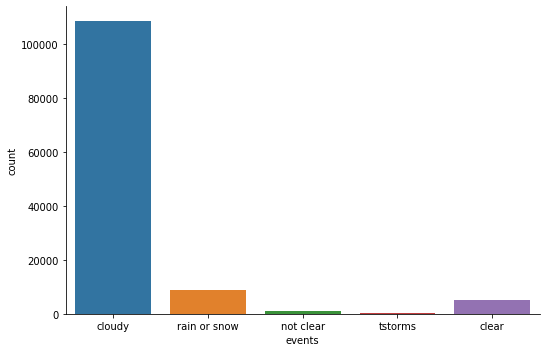

In [21]:
#People prefer to ride bicylce mostly during cloudy weather 
sns.factorplot(x='events',data=Top_Daily_Data,kind='count',size=5,aspect=1.5)


In [22]:
Top_Daily_Data.head()

trip_id  year  month  week  day  hour    usertype  gender      starttime  \
6   13518899  2017      3    13    4    23  Subscriber    Male  3/31/17 23:51   
16  13518889  2017      3    13    4    23  Subscriber  Female  3/31/17 23:45   
19  13518886  2017      3    13    4    23  Subscriber    Male  3/31/17 23:43   
23  13518882  2017      3    13    4    23  Subscriber    Male  3/31/17 23:34   
44  13518859  2017      3    13    4    23  Subscriber    Male  3/31/17 23:11   

         stoptime  tripduration  temperature  events  from_station_id  \
6   3/31/17 23:57      6.016667         37.9  cloudy               81   
16  3/31/17 23:52      7.450000         37.9  cloudy               77   
19  3/31/17 23:58     14.716667         37.9  cloudy               91   
23  3/31/17 23:44     10.283333         37.9  cloudy               75   
44  3/31/17 23:13      2.166667         37.9  cloudy               43   

               from_station_name  start_latitude  start_longitude  \
6             Daley Center Plaza       41.884241       -87.629634   
16       Clinton St & Madison St       41.882242       -87.641066   
19  Clinton St & Washington Blvd       41.883380       -87.641170   
23       Canal St & Jackson Blvd       41.877245       -87.639366   
44  Michigan Ave & Washington St       41.883893       -87.624649   

    dpcapacity_start  to_station_id            to_station_name  end_latitude  \
6                 39             41       Federal St & Polk St     41.872078   
16                31            175         Wells St & Polk St     41.872596   
19                31            182          Wells St & Elm St     41.903222   
23                31            197  Michigan Ave & Madison St     41.882134   
44                43             81         Daley Center Plaza     41.884241   

    end_longitude  dpcapacity_end  
6      -87.629544              19  
16     -87.633502              19  
19     -87.634324              23  
23     -87.625125              19  
44     -87.629634              39

In [23]:
Top_Daily_Data.temperature.unique()
Top_Daily_Data.events.unique()
#Top_Daily_Data.to_station_name.unique()
#Top_Daily_Data.groupby('to_station_name')['trip_id'].count().sort_values(ascending=False)#.head(10)

array(['cloudy', 'rain or snow', 'not clear', 'tstorms', 'clear'],
      dtype=object)

#New column to be created to display weekday/weekend
#User type can be imputed to 0 as Customer and 1 as Subscriber
#Gender type can be imputed to 0 as female and 1 as Male


In [24]:
Top_Daily_Data = Top_Daily_Data.drop(['trip_id'], axis = 1)


In [25]:
Top_Daily_Data.head()

year  month  week  day  hour    usertype  gender      starttime  \
6   2017      3    13    4    23  Subscriber    Male  3/31/17 23:51   
16  2017      3    13    4    23  Subscriber  Female  3/31/17 23:45   
19  2017      3    13    4    23  Subscriber    Male  3/31/17 23:43   
23  2017      3    13    4    23  Subscriber    Male  3/31/17 23:34   
44  2017      3    13    4    23  Subscriber    Male  3/31/17 23:11   

         stoptime  tripduration  temperature  events  from_station_id  \
6   3/31/17 23:57      6.016667         37.9  cloudy               81   
16  3/31/17 23:52      7.450000         37.9  cloudy               77   
19  3/31/17 23:58     14.716667         37.9  cloudy               91   
23  3/31/17 23:44     10.283333         37.9  cloudy               75   
44  3/31/17 23:13      2.166667         37.9  cloudy               43   

               from_station_name  start_latitude  start_longitude  \
6             Daley Center Plaza       41.884241       -87.629634   
16       Clinton St & Madison St       41.882242       -87.641066   
19  Clinton St & Washington Blvd       41.883380       -87.641170   
23       Canal St & Jackson Blvd       41.877245       -87.639366   
44  Michigan Ave & Washington St       41.883893       -87.624649   

    dpcapacity_start  to_station_id            to_station_name  end_latitude  \
6                 39             41       Federal St & Polk St     41.872078   
16                31            175         Wells St & Polk St     41.872596   
19                31            182          Wells St & Elm St     41.903222   
23                31            197  Michigan Ave & Madison St     41.882134   
44                43             81         Daley Center Plaza     41.884241   

    end_longitude  dpcapacity_end  
6      -87.629544              19  
16     -87.633502              19  
19     -87.634324              23  
23     -87.625125              19  
44     -87.629634              39

In [26]:
#Calculating distance from the lattitudes and longitudes

s_lat=41.884241
s_lng=-87.629634
e_lat=41.872078
e_lng=-87.629544
s_lat = s_lat*np.pi/180.0                      
s_lng = np.deg2rad(s_lng)     
e_lat = np.deg2rad(e_lat)                       
e_lng = np.deg2rad(e_lng)
R = 6373.0
d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
d=2 * R * np.arcsin(np.sqrt(d))
d=d*0.62137
#return distance_miles

print("Result:", d)

Result: 0.8406570615566726


In [27]:
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [28]:
Top_Daily_Data['distance_miles']=distance(Top_Daily_Data.start_latitude,Top_Daily_Data.start_longitude,Top_Daily_Data.end_latitude,Top_Daily_Data.end_longitude)

In [29]:
Top_Daily_Data['distance_miles']=Top_Daily_Data['distance_miles']*0.62137

In [30]:
Top_Daily_Data.head()

year  month  week  day  hour    usertype  gender      starttime  \
6   2017      3    13    4    23  Subscriber    Male  3/31/17 23:51   
16  2017      3    13    4    23  Subscriber  Female  3/31/17 23:45   
19  2017      3    13    4    23  Subscriber    Male  3/31/17 23:43   
23  2017      3    13    4    23  Subscriber    Male  3/31/17 23:34   
44  2017      3    13    4    23  Subscriber    Male  3/31/17 23:11   

         stoptime  tripduration  temperature  events  from_station_id  \
6   3/31/17 23:57      6.016667         37.9  cloudy               81   
16  3/31/17 23:52      7.450000         37.9  cloudy               77   
19  3/31/17 23:58     14.716667         37.9  cloudy               91   
23  3/31/17 23:44     10.283333         37.9  cloudy               75   
44  3/31/17 23:13      2.166667         37.9  cloudy               43   

               from_station_name  start_latitude  start_longitude  \
6             Daley Center Plaza       41.884241       -87.629634   
16       Clinton St & Madison St       41.882242       -87.641066   
19  Clinton St & Washington Blvd       41.883380       -87.641170   
23       Canal St & Jackson Blvd       41.877245       -87.639366   
44  Michigan Ave & Washington St       41.883893       -87.624649   

    dpcapacity_start  to_station_id            to_station_name  end_latitude  \
6                 39             41       Federal St & Polk St     41.872078   
16                31            175         Wells St & Polk St     41.872596   
19                31            182          Wells St & Elm St     41.903222   
23                31            197  Michigan Ave & Madison St     41.882134   
44                43             81         Daley Center Plaza     41.884241   

    end_longitude  dpcapacity_end  distance_miles  
6      -87.629544              19        0.840683  
16     -87.633502              19        0.771999  
19     -87.634324              23        1.415886  
23     -87.625125              19        0.806983  
44     -87.629634              39        0.257627

In [31]:
#convert time to day or night: if hour>=18 and <=6 then its night, hence column named "morning" is 0 else 1
def morning(data):
    if (data['hour']>=18) or (data['hour']<=6):
        morning=0
    else: morning=1
    return morning

In [32]:
Top_Daily_Data['morning']=Top_Daily_Data.apply(morning,axis=1)

In [33]:
Top_Daily_Data['morning'].value_counts()

1    96795
0    27500
Name: morning, dtype: int64

In [34]:
#value counts of month
Top_Daily_Data['month'].value_counts()

6    40137
5    29780
3    18862
2    17352
1    13723
4     4441
Name: month, dtype: int64

In [35]:
#convert months 1,2,3,4 to 0 and 5,6 to 1. 1 indicates summer, 0 non summer (winter, spring)
def season(data):
    if (data['month']==5) or (data['month']==6):
        season=1
    else: season=0
    return season

In [36]:
Top_Daily_Data['season']=Top_Daily_Data.apply(season,axis=1)

In [37]:
Top_Daily_Data['season'].value_counts()

1    69917
0    54378
Name: season, dtype: int64

In [38]:
Top_Daily_Data['day'].value_counts()

2    24979
1    24464
3    24168
4    22240
0    21445
5     3603
6     3396
Name: day, dtype: int64

In [39]:
#convert day 0,1,2,3,4 to 1 and 5,6 to 0. 1 indicates weekday, 0 weekend
def weekday(data):
    if (data['day']==5) or (data['day']==6):
        weekday=0
    else:weekday=1
    return weekday

In [40]:
Top_Daily_Data['weekday']=Top_Daily_Data.apply(weekday,axis=1)

In [41]:
Top_Daily_Data['weekday'].value_counts()

1    117296
0      6999
Name: weekday, dtype: int64

In [42]:
#convert hour to peak and non-peak, 6-9 AM and 4-7PM are peak
def peak(data):
    peak_hr=[6,7,8,9,16,17,18,19]
    if data['hour'] in peak_hr:
        peak=1
    else: peak=0
    return peak

In [43]:
Top_Daily_Data['peak']=Top_Daily_Data.apply(peak,axis=1)

In [44]:
Top_Daily_Data['peak'].value_counts()

1    95564
0    28731
Name: peak, dtype: int64

In [45]:
Top_Daily_Data.columns

Index(['year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'start_latitude',
       'start_longitude', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'end_latitude', 'end_longitude', 'dpcapacity_end',
       'distance_miles', 'morning', 'season', 'weekday', 'peak'],
      dtype='object')

In [46]:
data_for_model=Top_Daily_Data[['month', 'week', 'day', 'hour','usertype','gender','tripduration','temperature','events','from_station_id',
                               'to_station_id','distance_miles','morning','season','weekday','peak']]



In [47]:
data_for_model.head()

month  week  day  hour    usertype  gender  tripduration  temperature  \
6       3    13    4    23  Subscriber    Male      6.016667         37.9   
16      3    13    4    23  Subscriber  Female      7.450000         37.9   
19      3    13    4    23  Subscriber    Male     14.716667         37.9   
23      3    13    4    23  Subscriber    Male     10.283333         37.9   
44      3    13    4    23  Subscriber    Male      2.166667         37.9   

    events  from_station_id  to_station_id  distance_miles  morning  season  \
6   cloudy               81             41        0.840683        0       0   
16  cloudy               77            175        0.771999        0       0   
19  cloudy               91            182        1.415886        0       0   
23  cloudy               75            197        0.806983        0       0   
44  cloudy               43             81        0.257627        0       0   

    weekday  peak  
6         1     0  
16        1     0  
19        1     0  
23        1     0  
44        1     0

In [48]:
#calculate average distance for each start station 
avg_dist=data_for_model.groupby('from_station_id',as_index=False)['distance_miles'].mean()
avg_dist=pd.DataFrame(avg_dist)
avg_dist.columns=['from_station_id','avg_dist']
avg_dist

from_station_id  avg_dist
0               43  0.998779
1               75  1.081266
2               77  1.061612
3               81  1.223453
4               91  1.052817
5              133  0.921209
6              174  1.114798
7              192  1.167511
8              195  1.070397
9              287  1.262959

In [49]:
#create a new dataframe which has the average distance travelled from each start station
data_for_model2=pd.merge(data_for_model, avg_dist, how='left', on='from_station_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)

In [50]:
data_for_model2.head()

month  week  day  hour    usertype  gender  tripduration  temperature  \
0      3    13    4    23  Subscriber    Male      2.166667         37.9   
1      3    13    4    19  Subscriber  Female     20.700000         41.0   
2      3    13    4    18  Subscriber    Male      7.433333         42.1   
3      3    13    4    18  Subscriber  Female     17.650000         42.1   
4      3    13    4    18  Subscriber    Male      9.083333         42.1   

   events  from_station_id  to_station_id  distance_miles  morning  season  \
0  cloudy               43             81        0.257627        0       0   
1  cloudy               43            202        2.136992        0       0   
2  cloudy               43             91        0.850839        0       0   
3  cloudy               43            273        1.802507        0       0   
4  cloudy               43             91        0.850839        0       0   

   weekday  peak  avg_dist  
0        1     0  0.998779  
1        1     1  0.998779  
2        1     1  0.998779  
3        1     1  0.998779  
4        1     1  0.998779

In [51]:
data_for_model2['avg_dist'].isnull().sum()

0

In [52]:
#create dummies for factor variables
usertype=pd.get_dummies(data_for_model2['usertype'],drop_first=True)
gender=pd.get_dummies(data_for_model2['gender'],drop_first=True)
events=pd.get_dummies(data_for_model2['events'],drop_first=True)
start_stations=pd.get_dummies(data_for_model2['from_station_id'],drop_first=True)
peak=pd.get_dummies(data_for_model2['peak'],drop_first=True)

In [53]:
#new data frame with dummies
data_for_model_dummies=pd.concat([data_for_model2,usertype,gender,events],axis=1)
data_for_model_dummies=pd.concat([data_for_model_dummies,start_stations],axis=1)
data_for_model_dummies=pd.concat([data_for_model_dummies,peak],axis=1)

In [54]:
data_for_model_dummies.drop(['usertype','gender','events'],axis=1,inplace=True)
data_for_model_dummies.drop(['from_station_id'],axis=1,inplace=True)

In [55]:
data_for_model_dummies.head()

month  week  day  hour  tripduration  temperature  to_station_id  \
0      3    13    4    23      2.166667         37.9             81   
1      3    13    4    19     20.700000         41.0            202   
2      3    13    4    18      7.433333         42.1             91   
3      3    13    4    18     17.650000         42.1            273   
4      3    13    4    18      9.083333         42.1             91   

   distance_miles  morning  season  weekday  peak  avg_dist  Subscriber  Male  \
0        0.257627        0       0        1     0  0.998779           1     1   
1        2.136992        0       0        1     1  0.998779           1     0   
2        0.850839        0       0        1     1  0.998779           1     1   
3        1.802507        0       0        1     1  0.998779           1     0   
4        0.850839        0       0        1     1  0.998779           1     1   

   cloudy  not clear  rain or snow  tstorms  75  77  81  91  133  174  192  \
0       1          0             0        0   0   0   0   0    0    0    0   
1       1          0             0        0   0   0   0   0    0    0    0   
2       1          0             0        0   0   0   0   0    0    0    0   
3       1          0             0        0   0   0   0   0    0    0    0   
4       1          0             0        0   0   0   0   0    0    0    0   

   195  287  1  
0    0    0  0  
1    0    0  1  
2    0    0  1  
3    0    0  1  
4    0    0  1

In [56]:
data_for_model_dummies['to_station_id']=data_for_model_dummies['to_station_id'].astype(str)

In [57]:
data_for_model_dummies.columns

Index([         'month',           'week',            'day',           'hour',
         'tripduration',    'temperature',  'to_station_id', 'distance_miles',
              'morning',         'season',        'weekday',           'peak',
             'avg_dist',     'Subscriber',           'Male',         'cloudy',
            'not clear',   'rain or snow',        'tstorms',               75,
                     77,               81,               91,              133,
                    174,              192,              195,              287,
                      1],
      dtype='object')

In [58]:
#scale the data
X=data_for_model_dummies[[ 'month',           'week',            'day',           'hour',
                          'temperature', 'distance_miles',
              'morning',         'season',        'weekday',           'peak',
             'avg_dist',     'Subscriber',           'Male',         'cloudy',
            'not clear',        'tstorms',75,
                     77,               81,               91,
                    174,              192,              195,              287,
                      1  ]]
y=data_for_model_dummies['tripduration']

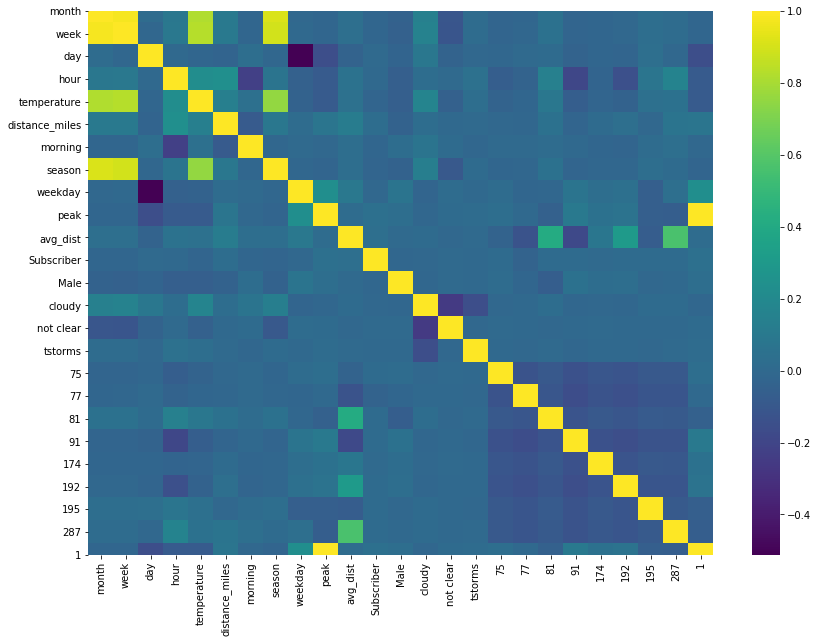

In [59]:
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(),cmap='viridis')

In [60]:
X.corr()

month      week       day      hour  temperature  \
month           1.000000  0.978244  0.015203  0.088125     0.818672   
week            0.978244  1.000000 -0.011679  0.091957     0.831674   
day             0.015203 -0.011679  1.000000 -0.003227    -0.017687   
hour            0.088125  0.091957 -0.003227  1.000000     0.225511   
temperature     0.818672  0.831674 -0.017687  0.225511     1.000000   
distance_miles  0.097075  0.099325 -0.027763  0.233937     0.135877   
morning        -0.017938 -0.019961  0.026377 -0.223038     0.042482   
season          0.916795  0.893860 -0.013982  0.072575     0.753908   
weekday        -0.007729 -0.001423 -0.511398 -0.045826    -0.043416   
peak           -0.018952 -0.017911 -0.153908 -0.085517    -0.084056   
avg_dist        0.034168  0.034348 -0.034229  0.059794     0.046066   
Subscriber     -0.019639 -0.019180  0.003628 -0.001882    -0.021503   
Male           -0.044803 -0.045755 -0.029002 -0.061728    -0.060519   
cloudy          0.141943  0.150324  0.086882  0.025429     0.168777   
not clear      -0.105368 -0.111414 -0.033768  0.006238    -0.047604   
tstorms         0.016800  0.019561 -0.005519  0.045648     0.029887   
75             -0.024957 -0.025062 -0.012007 -0.063909    -0.035288   
77             -0.015748 -0.015098  0.003998 -0.038050    -0.021257   
81              0.054489  0.055240  0.011980  0.142310     0.085053   
91             -0.023423 -0.023713 -0.035730 -0.188202    -0.062737   
174            -0.017331 -0.017651 -0.019176 -0.031467    -0.021690   
192            -0.006963 -0.007057 -0.022790 -0.142379    -0.042635   
195             0.028159  0.027079  0.036750  0.074512     0.040208   
287             0.019170  0.019007 -0.004469  0.164160     0.055338   
1              -0.018952 -0.017911 -0.153908 -0.085517    -0.084056   

                distance_miles   morning    season   weekday      peak  \
month                 0.097075 -0.017938  0.916795 -0.007729 -0.018952   
week                  0.099325 -0.019961  0.893860 -0.001423 -0.017911   
day                  -0.027763  0.026377 -0.013982 -0.511398 -0.153908   
hour                  0.233937 -0.223038  0.072575 -0.045826 -0.085517   
temperature           0.135877  0.042482  0.753908 -0.043416 -0.084056   
distance_miles        1.000000 -0.082544  0.089723  0.015926  0.075797   
morning              -0.082544  1.000000 -0.013129  0.006095 -0.004721   
season                0.089723 -0.013129  1.000000 -0.015408 -0.022681   
weekday               0.015926  0.006095 -0.015408  1.000000  0.227600   
peak                  0.075797 -0.004721 -0.022681  0.227600  1.000000   
avg_dist              0.119354  0.026492  0.027865  0.091183  0.017983   
Subscriber            0.025218 -0.016569 -0.021520 -0.003988  0.039436   
Male                 -0.044941  0.024366 -0.042333  0.069109  0.029051   
cloudy                0.021819  0.069689  0.129252 -0.023186 -0.011775   
not clear            -0.001178  0.010418 -0.097066  0.019292  0.009883   
tstorms               0.002526 -0.009987  0.010459  0.000628  0.016176   
75                   -0.004462  0.004179 -0.021282  0.016771  0.030025   
77                   -0.015052  0.005867 -0.011784 -0.016641 -0.000163   
81                    0.049478  0.015345  0.049903 -0.011623 -0.049433   
91                   -0.021494 -0.001898 -0.021980  0.067895  0.098052   
174                   0.009785 -0.019070 -0.014660  0.031529  0.051881   
192                   0.036464 -0.025114 -0.009735  0.041076  0.063910   
195                  -0.008367  0.018231  0.027803 -0.058969 -0.061722   
287                   0.067692  0.033934  0.013596  0.034566 -0.063204   
1                     0.075797 -0.004721 -0.022681  0.227600  1.000000   

                avg_dist  Subscriber      Male    cloudy  not clear   tstorms  \
month           0.034168   -0.019639 -0.044803  0.141943  -0.105368  0.016800   
week            0.034348   -0.019180 -0.045755  0.150324  -0.111414  0.019561   
day 

In [61]:
#tripduration:distance, season:temperature, cloudy:rain or snow, are highly correlated, keeping one of those

In [62]:
#original variables
#X=data_for_model_dummies[[    'temperature', 'distance_miles',
 #             'morning',         'season',        'weekday',     'Subscriber',
  #               'Male',         'cloudy',               75,               77,               81,
   #                  91,              133,              174,              192,
    #                195,              287]]

X=data_for_model_dummies[[ 'temperature', 'distance_miles',
              'weekday',           'peak',
            'Subscriber',           'Male',
            75,
                     77,               81,               91,              133,
                    174,              192,              195,              287]]
y=data_for_model_dummies['tripduration']

In [63]:
#scaler=StandardScaler()

In [64]:
#X_scaled=scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression


In [68]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-13.089907264583855
[ 4.71883671e-02 -5.24088855e-03  2.06195221e-02  2.23131032e-02
  9.77096580e-03  6.76726081e+00  5.39887335e-01  1.38746652e-01
 -7.18631720e-01  4.07101392e-03  1.59111803e+01  9.47831033e-01
 -1.21558971e+00  5.69200109e-03 -1.79328810e-01 -3.63835379e-01
 -1.24986774e+00 -1.21253979e+00 -3.93062914e+00 -9.06732674e-01
 -2.35567681e+00 -2.63705616e+00 -1.20498380e+00 -4.52504583e+00
  4.07101392e-03]


In [70]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)


In [71]:
Duration = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Duration

Actual  Predicted
43191   33.033333  32.591362
36747    6.750000   6.745950
34757   17.266667  21.312709
70321    5.300000   6.331673
90422    8.616667   9.108145
...           ...        ...
9155    11.050000   9.311364
72696    3.450000   4.683766
122380  10.300000  12.128522
53362   10.550000   9.447505
33345   15.566667  14.819082

[37289 rows x 2 columns]

In [72]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 2.1089710565989566
Mean Squared Error: 10.095221743208276
Root Mean Squared Error: 3.1772978681905597


In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.0993974644542517
Mean Squared Error: 9.913519713094383
Root Mean Squared Error: 3.148574234966421


In [75]:
print('Variance score test: %.2f' % regressor.score(X_test, y_pred))
print('Variance score train: %.2f' % regressor.score(X_train, y_pred_train))


Variance score test: 1.00
Variance score train: 1.00


In [76]:
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)
r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

Slope: [ 4.71883671e-02 -5.24088855e-03  2.06195221e-02  2.23131032e-02
  9.77096580e-03  6.76726081e+00  5.39887335e-01  1.38746652e-01
 -7.18631720e-01  4.07101392e-03  1.59111803e+01  9.47831033e-01
 -1.21558971e+00  5.69200109e-03 -1.79328810e-01 -3.63835379e-01
 -1.24986774e+00 -1.21253979e+00 -3.93062914e+00 -9.06732674e-01
 -2.35567681e+00 -2.63705616e+00 -1.20498380e+00 -4.52504583e+00
  4.07101392e-03]
Intercept: -13.089907264583855
R2 score:  0.7387252184827842


# Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [78]:
regr = RandomForestRegressor(n_estimators=15)
regr.fit(X_train, y_train)
Y_pred_rfg=regr.predict(X_test)


In [79]:
regr.score(X_train,y_pred_train)

0.7735513172093251

In [80]:
regr.score(X_test,Y_pred_rfg)

1.0

In [81]:
Duration1 = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred_rfg,'Difference':y_test-Y_pred_rfg})
Duration1

Actual  Predicted  Difference
43191   33.033333  38.195556   -5.162222
36747    6.750000   7.083333   -0.333333
34757   17.266667  23.394444   -6.127778
70321    5.300000   5.047222    0.252778
90422    8.616667  10.193333   -1.576667
...           ...        ...         ...
9155    11.050000  10.732593    0.317407
72696    3.450000   3.213481    0.236519
122380  10.300000  13.237407   -2.937407
53362   10.550000   8.537685    2.012315
33345   15.566667  16.186944   -0.620278

[37289 rows x 3 columns]

In [82]:

import plotly.offline as pyo

In [83]:
error_trace = {'type' : 'scatter',
              'x' : Duration1['Actual'],
              'y' : Duration1['Predicted'],
              'mode' : 'markers',
              'marker' : {'size' : abs(Duration1['Difference']/2)}}

layout = {'title' : 'Random Forest Error Analysis',
         'xaxis' : {'title' : 'Actual Trip duration'},
         'yaxis' : {'title' : 'Predicted Trip duration'},
         'hovermode' : 'closest'}

error_analysis = {'data': [error_trace], 'layout' : layout}
pyo.iplot(error_analysis)